In [24]:
import numpy as np
import pandas as pd

1. Additions= (k^2-1)*m*n
 Multiplication = (k^2)*m*n

2.

In [32]:
# a=np.array([[12,2,3],[2,3,4],[2,7,8]])
# b=np.full((3,3),2)

In [33]:
# print(b)

[[2 2 2]
 [2 2 2]
 [2 2 2]]


In [34]:
# e=np.matmul(a,b)
# print(e)

[[34 34 34]
 [18 18 18]
 [34 34 34]]


2.Multiplying matrices using list

In [36]:
l1=[1,9,1]
l2=[1,2,7]
l3=[1,0,3]
m1=[l1,l2,l3]
m2=[l2,l3,l1]
# l4*l5
# rows and column of the resultant matrix
def sumofproducts(m1,m2,i,j):
  lr=m1[i]
  lc=[]
  for a in range(len(m1)):
    lc.append(m2[a][j])
  sum=0
  for b in range(len(lr)):
    sum+=lr[b]*lc[b]
  return sum

row=len(m1)
column=len(m2[0])
# l=[0]*column
# result=[l]*row
result=[[0,0,0],[0,0,0],[0,0,0]]

for i in range(row):
  for j in range(column):
    result[i][j]=sumofproducts(m1,m2,i,j)
print(result)



[[11, 11, 35], [10, 65, 20], [4, 29, 10]]


2.Multiplying 2 matrices using numpy


In [37]:
result1=np.matmul(np.array(m1),np.array(m2))
print(result1)

[[11 11 35]
 [10 65 20]
 [ 4 29 10]]


2.My code has order n^3 but matmul has order n^2.81 due to better optimization

3.

In [51]:
import time
start_time = time.time()

l=[3,42,414,463,24]
k=-100000000000
a=0
for j in range(len(l)):
  for i in range(len(l)-j):
    if l[i]>k:
      k=l[i]
      a=i
  l[a],l[len(l)-j-1]=l[len(l)-j-1],l[a]
  k=-1000000000000



print(l)
if len(l)%2!=0:
  print(l[int((len(l)-1)/2)])
else:
  d=len(l)
  e=l[int(d/2)]
  f=l[int(d/2)-1]
  print((e+f)/2)


time_total = time.time() - start_time
print(time_total)


[3, 24, 42, 414, 463]
42
0.0035393238067626953


This method has a time complexity of n^2 . This can be improve by using quick sort method which has time complexity of order nlog(n).

In [50]:
start_time = time.time()


def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
        return quicksort(left) + middle + quicksort(right)


l = [3, 42, 414, 463, 24]
l = quicksort(l)
print(l)
if len(l)%2!=0:
  print(l[int((len(l)-1)/2)])
else:
  d=len(l)
  e=l[int(d/2)]
  f=l[int(d/2)-1]
  print((e+f)/2)

time_total = time.time() - start_time
print(time_total)

[3, 24, 42, 414, 463]
42
0.0010097026824951172


Clearly the time taken by this algo is less

In [57]:
arr=np.array(l)
start_time = time.time()
print(np.median(arr))
time_total = time.time() - start_time
print(time_total)

42.0
0.0008900165557861328


np.median takes less time than either of the of the two code written earlier

4.Wrt to x: 2xy+ y^3*cos(x)
  wrt to y: x^2 + 3y^2*sin(x)

5.Finding slope using JAX

In [ ]:
import jax
import jax.numpy as jnp

def f(x):
  return (x**2) + jnp.sin(x)
diff_f = jax.grad(f)
x=1.0
print(diff_f(x))

grad_f = jax.grad(f)

# Evaluate the gradient at x = 2.0
x = 2.0
print("Gradient of f at x=2.0:", grad_f(x))


2.5403023
Gradient of f at x=2.0: 3.5838532


Gradient can only be calculated at floating points since it is continous and int isn't.

In [ ]:
import jax
import jax.numpy as jnp

def f(x):
    return x ** 2

grad_f = jax.grad(f)

# Evaluate the gradient at x = 1 (integer)
x = 1
try:
    gradient = grad_f(x)
    print("Gradient of f at x=1:", gradient)
except Exception as e:
    print("Error:", e)
print("help")

Error: grad requires real- or complex-valued inputs (input dtype that is a sub-dtype of np.inexact), but got int32. If you want to use Boolean- or integer-valued inputs, use vjp or set allow_int to True.
help


In [ ]:
# derivative of the the function with respect to x... here we have to pass on the first variable as the variable wrt to which it will be differentiated

def f(a,x,y):
  return (x**2)*y + jnp.sin(x)*y**3
grad_f=jax.grad(f)
x=1.0
y=1.0
a=10.0
print(grad_f(a,x,y))

def g(a,y,x):
  return (x**2)*y + jnp.sin(x)*y**3

grad_g=jax.grad(g)
print(jax.grad(g)(a,y,x))




0.0
0.0


In [ ]:
import jax
import jax.numpy as jnp

# Define the multivariable function
def f(x):
    return jnp.sin(x[0]) * jnp.cos(x[1]) + jnp.exp(x[2])

# Compute the gradient of the function
grad_f = jax.grad(f)

# Evaluate the gradient at a specific point, e.g., x = [1.0, 2.0, 3.0]
x = jnp.array([1.0, 2.0, 3.0], dtype=jnp.float32)
gradient = grad_f(x)

print("Gradient of f at x=[1.0, 2.0, 3.0]:", gradient)
# i think the answer gives the result when the diff occurs wrt to x[0] as first ans then wrt x[1] and then x[2]


Gradient of f at x=[1.0, 2.0, 3.0]: [-0.22484508 -0.7651474  20.085537  ]


6.finding differentiated function using sympy

In [ ]:
import sympy as sp
import jax.numpy as jnp
import numpy as np

x,y,z=sp.symbols('x y z')

f=(x**2)*y + (sp.sin(x))*(y**3)
grad=sp.diff(f,x)
print(grad)

2*x*y + y**3*cos(x)


Q7

In [40]:
# Branch 1
roll_1_2022_=[1,2,3]
name_1_2022_=['Riya','Dinesh','Kartik']
maths_1_2022_=[100,70,80]
english_1_2022_=[70,80,90]
# marks_1_2022={'Maths':maths_1_2022,'English':english_1_2022}
name_1_2022={}
maths_1_2022={}
english_1_2022={}
roll_1_2022={}
for i in range(len(roll_1_2022_)):
  roll_1_2022[roll_1_2022_[i]]=roll_1_2022_[i]
  name_1_2022[roll_1_2022_[i]]=name_1_2022_[i]
  maths_1_2022[roll_1_2022_[i]]=maths_1_2022_[i]
  english_1_2022[roll_1_2022_[i]]=english_1_2022_[i]
b1_2022_marks={'Maths_Marks':maths_1_2022,'English_Marks':english_1_2022}
b1_2022={'Roll Number':roll_1_2022,'Name':name_1_2022,'Marks':b1_2022_marks}
b1_2023={}
b1_2024={}
b1_2025={}
b1={2022:b1_2022,2023:b1_2023,2024:b1_2024,2025:b1_2025}



# Branch 2
# roll_1_2022_=[1,2,3]
# name_1_2022_=['Riya','Dinesh','Kartik']
# maths_1_2022_=[100,70,80]
# english_1_2022_=[70,80,90]
# # marks_1_2022={'Maths':maths_1_2022,'English':english_1_2022}
# name_1_2022={}
# maths_1_2022={}
# english_1_2022={}
# for i in range(len(roll_1_2022_)):
#   roll_1_2022[roll_1_2022_[i]]=roll_1_2022[i]
#   name_1_2022[roll_1_2022_[i]]=name_1_2022_[i]
#   maths_1_2022[roll_1_2022_[i]]=maths_1_2022_[i]
#   english_1_2022[roll_1_2022_[i]]=english_1_2022_[i]
b1_2022_marks={'Maths_Marks':maths_1_2022,'English_Marks':english_1_2022}
b1_2022={'Roll Number':roll_1_2022,'Name':name_1_2022,'Marks':b1_2022_marks}
b1_2023={}
b1_2024={}
b1_2025={}
b1={2022:b1_2022,2023:b1_2023,2024:b1_2024,2025:b1_2025}


branch={'Branch 1':b1,'Branch 2':b1}

def get_marks(branch,year,roll,db):
  Name=db[branch][year]['Name'][roll]
  Roll=db[branch][year]['Roll Number'][roll]
  Marks_eng=db[branch][year]['Marks']['English_Marks'][roll]
  Marks_Maths=db[branch][year]['Marks']['Maths_Marks'][roll]
  print(Name)
  print(Roll)
  print('English:',Marks_eng,'Maths:',Marks_Maths)

yr=int(input('Which Year'))
bran=input('Branch 1 or Branch 2')
rol=int(input('Roll No?'))
get_marks(bran,yr,rol,branch)


Which Year2022
Branch 1 or Branch 2Branch 1
Roll No?1
Riya
1
English: 70 Maths: 100


Q8

In [7]:
class years:
  def __init__(self,year,b_name,roll,name,eng_marks,maths_marks):
    self.year=year
    self.branch_details=self.branch(b_name,roll,name,eng_marks,maths_marks)
  def show_marks(self):
    self.branch_details.show().show_().get_marks()
  class branch:
    def __init__(self,b_name,roll,name,eng_marks,maths_marks):
      self.b_name=b_name
      self.students=self.student(roll,name,eng_marks,maths_marks)
    def show(self):
      return self.students
    class student:
      def __init__(self,roll,name,eng_marks,maths_marks):
        self.roll=roll
        self.name=name
        self.mark=self.marks(eng_marks,maths_marks)
      def show_(self):
        return self.mark
      class marks:
        def __init__(self,english,maths):
          self.english=english
          self.maths=maths

        def get_marks(self):
          print('English',self.english)
          print('Maths',self.maths)


s1=years(2022,'Branch 1',1,'N',100,70)

s1.show_marks()




English 100
Maths 70


Question no. 9

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def f1(x):
  return x
def f2(x):
  return np.power(x,2)
def f3(x):
  return np.power(x,3)/100
def f4(x):
  return np.sin(x)
def f5(x):
  return (np.sin(x))/x
def f6(x):
  return np.log(x)
def f7(x):
  return np.exp(x)

In [13]:
x=[]
i=0.5
while(i<100):
  x.append(i)
  i+=0.5



Text(0.5, 1.0, '7')

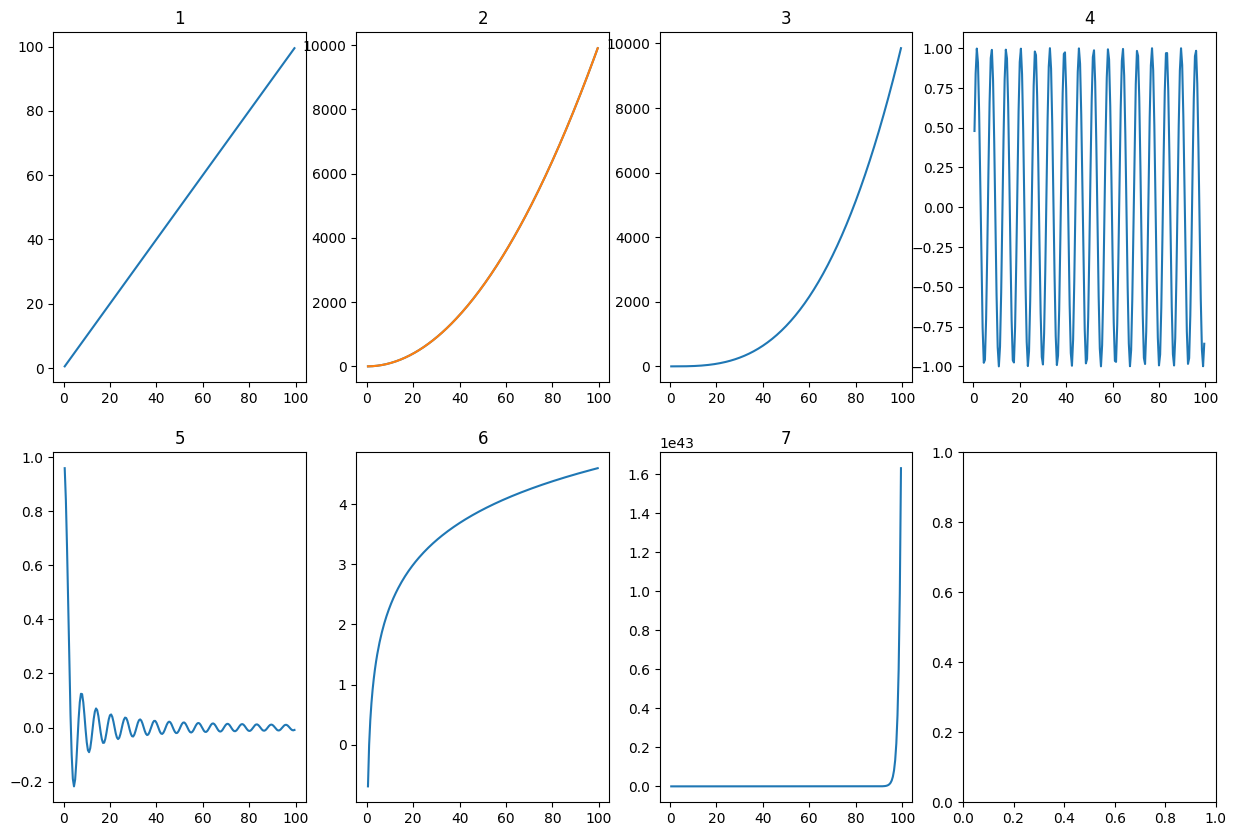

In [36]:
fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8))=plt.subplots(2,4,figsize=(15,10))
ax1.plot(x,f1(x))
ax1.set_title('1')

ax2.plot(x,f2(x))
ax2.set_title('2')

ax2.plot(x,f2(x))
ax2.set_title('2')

ax3.plot(x,f3(x))
ax3.set_title('3')

ax4.plot(x,f4(x))
ax4.set_title('4')

ax5.plot(x,f5(x))
ax5.set_title('5')

ax6.plot(x,f6(x))
ax6.set_title('6')

ax7.plot(x,f7(x))
ax7.set_title('7')



Question No.10

In [10]:
import numpy as np

In [11]:
matrix = np.random.uniform(1, 2, (20, 5))

In [12]:
print(matrix)

[[1.41873659 1.88935249 1.65905805 1.32535487 1.34997556]
 [1.85861793 1.96437226 1.64547918 1.57773408 1.07595711]
 [1.06466094 1.36540559 1.32913389 1.46587706 1.14599715]
 [1.75256294 1.97112208 1.21115346 1.54540362 1.91025391]
 [1.09036987 1.16158209 1.62907541 1.97872471 1.71005894]
 [1.38167632 1.10147347 1.67277982 1.21166446 1.00010624]
 [1.74521388 1.15158444 1.47740354 1.081078   1.97811805]
 [1.66452467 1.97556655 1.70589793 1.3814273  1.36301032]
 [1.34434774 1.82765532 1.3659134  1.10890167 1.46950792]
 [1.06320699 1.58140294 1.17591115 1.99356091 1.58602484]
 [1.72327499 1.89289497 1.20102099 1.08179196 1.21286445]
 [1.90221337 1.71480184 1.20438414 1.14865219 1.39665432]
 [1.54958326 1.96319427 1.40535412 1.91988322 1.08155574]
 [1.87441279 1.8080782  1.79119914 1.35572254 1.19282973]
 [1.52433644 1.11240039 1.84581136 1.97634819 1.89521791]
 [1.38752743 1.118132   1.2149368  1.78381164 1.05918772]
 [1.18993333 1.60065445 1.55362234 1.97819299 1.30135167]
 [1.08427474 1

In [13]:
import pandas as pd
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])
display(df)

,a,b,c,d,e
0,1.418737,1.889352,1.659058,1.325355,1.349976
1,1.858618,1.964372,1.645479,1.577734,1.075957
2,1.064661,1.365406,1.329134,1.465877,1.145997
3,1.752563,1.971122,1.211153,1.545404,1.910254
4,1.090370,1.161582,1.629075,1.978725,1.710059
5,1.381676,1.101473,1.672780,1.211664,1.000106
6,1.745214,1.151584,1.477404,1.081078,1.978118
7,1.664525,1.975567,1.705898,1.381427,1.363010
8,1.344348,1.827655,1.365913,1.108902,1.469508
9,1.063207,1.581403,1.175911,1.993561,1.586025


Column with maxium standard deviation

In [14]:
j=0
col='a'
for i in df.columns:
  if df[i].std() >=j:
    j=df[i].std()
    col=i


In [15]:
print(col,j)

d 0.3526407548542711


Row with lowest mean

In [16]:
k=1000000000
row='c'
for i in range(len(df)):
  if df.iloc[i,:].mean()<=k:
    k=df.iloc[i,:].mean()
    row=i
print(i+1,'th',k)



20 th 1.2735400622131174


Question 11

In [18]:
df.loc[:,'f']=df.loc[:,'a']+df.loc[:,'b']+df.loc[:,'c']+df.loc[:,'d']+df.loc[:,'e']

In [22]:
df.loc[:,'g']=df.loc[:,'f']
for i in range(len(df)):
  if df.loc[i,'f']<8:
    df.loc[i,'g']='LT8'
  else:
    df.loc[i,'g']='GT8'

<ipython-input-22-326175535019>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'LT8' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i,'g']='LT8'


In [23]:
display(df)

,a,b,c,d,e,f,g
0,1.418737,1.889352,1.659058,1.325355,1.349976,7.642478,LT8
1,1.858618,1.964372,1.645479,1.577734,1.075957,8.122161,GT8
2,1.064661,1.365406,1.329134,1.465877,1.145997,6.371075,LT8
3,1.752563,1.971122,1.211153,1.545404,1.910254,8.390496,GT8
4,1.090370,1.161582,1.629075,1.978725,1.710059,7.569811,LT8
5,1.381676,1.101473,1.672780,1.211664,1.000106,6.367700,LT8
6,1.745214,1.151584,1.477404,1.081078,1.978118,7.433398,LT8
7,1.664525,1.975567,1.705898,1.381427,1.363010,8.090427,GT8
8,1.344348,1.827655,1.365913,1.108902,1.469508,7.116326,LT8
9,1.063207,1.581403,1.175911,1.993561,1.586025,7.400107,LT8


Quesition 12

Suppose we have to add B array (1x3) to each column of A array (4x3). Numpy Makes treats array B(1x3) as B(4x3) where the rows are identical and same as B(1x3) and performs the addition

In [24]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

B = np.array([1, 0, 1])
# Broadcasting B to match the shape of A
C = A + B
print(C)


[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Question 13

In [9]:
import numpy as np
a=np.random.uniform(1,6,(1,4))
def argmin(arr):
  a=100000000000000
  b=(0,0)
  for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
      if arr[i,j]<=a:
        k=arr[i,j]
        b=(i,j)
  return b
print(argmin(a))
print(np.argmin(a))





(0, 3)
3
